# Compensation Analysis of the IBM Employee Data-set

dataset info:

Title: IBM HR Analytics Employee Attrition & Performance Dataset

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Date Accessed: September 26, 2023

In [21]:
# loading python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [22]:
# creating a dataframe for the dataset
df = pd.read_csv('IBM.csv')

In [28]:
# running EDA on the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


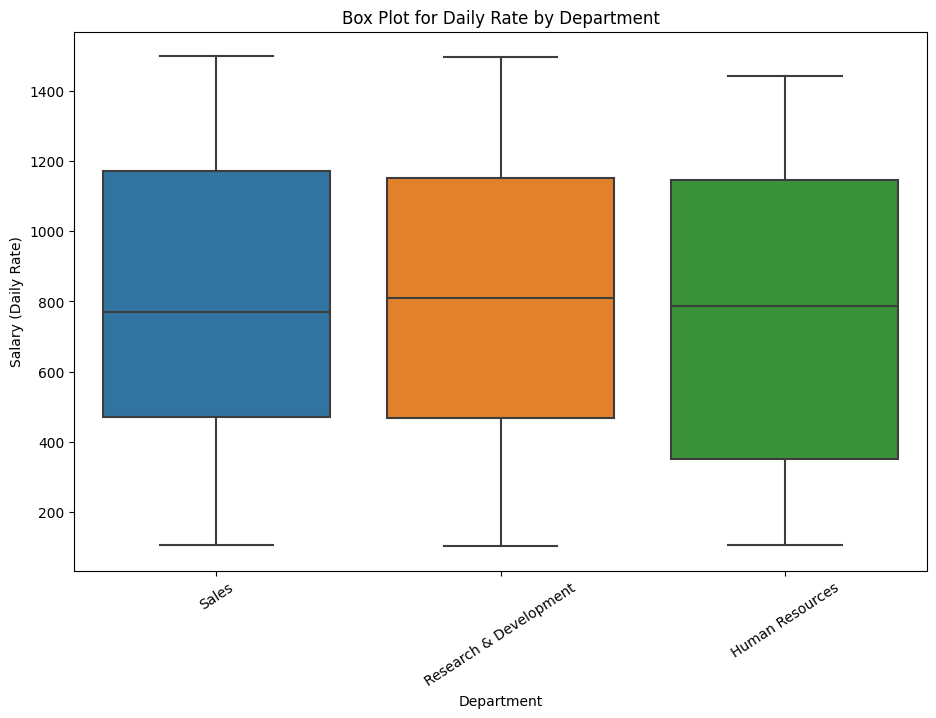

In [24]:
# visualizing the monthly rate by department using a box plot
plt.figure(figsize=(11, 7))
sns.boxplot(x='Department', y='MonthlyRate', data=df)

# adding graph information
plt.xlabel('Department')
plt.ylabel('Monthly Rate')
plt.title('Box Plot for Daily Rate by Department')
plt.xticks(rotation=33)
plt.show()

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

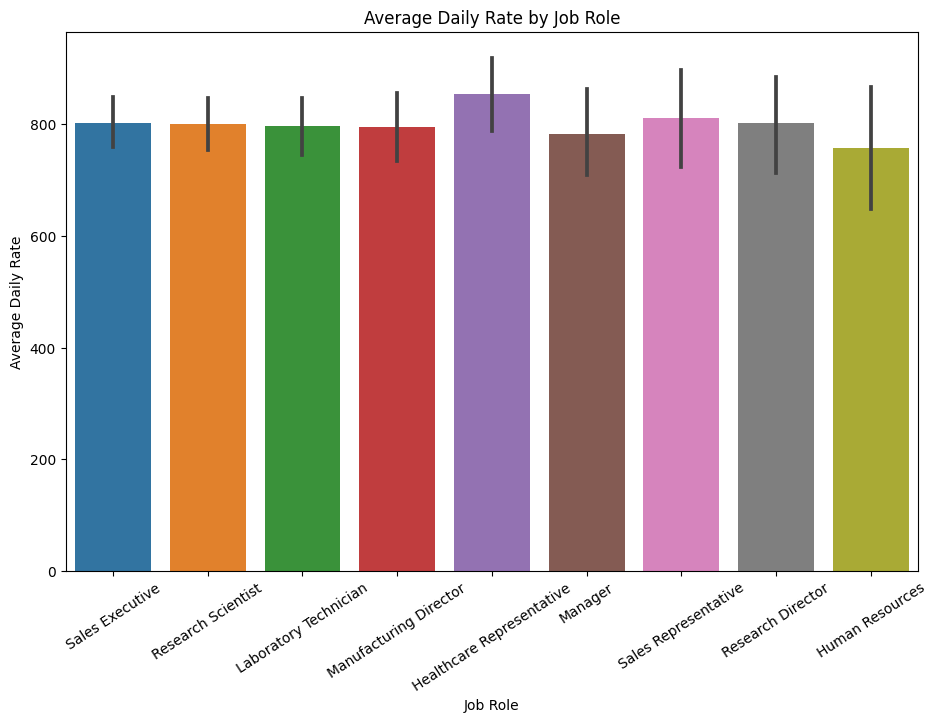

In [25]:
# analyzing pay by job role in a bar plot
plt.figure(figsize=(11, 7))
sns.barplot(x='JobRole', y='MonthlyRate', data=df)
plt.xlabel('Job Role')
plt.ylabel('Average Monthly Rate')
plt.title('Average Monthly Rate by Job Role')
plt.xticks(rotation=33)

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


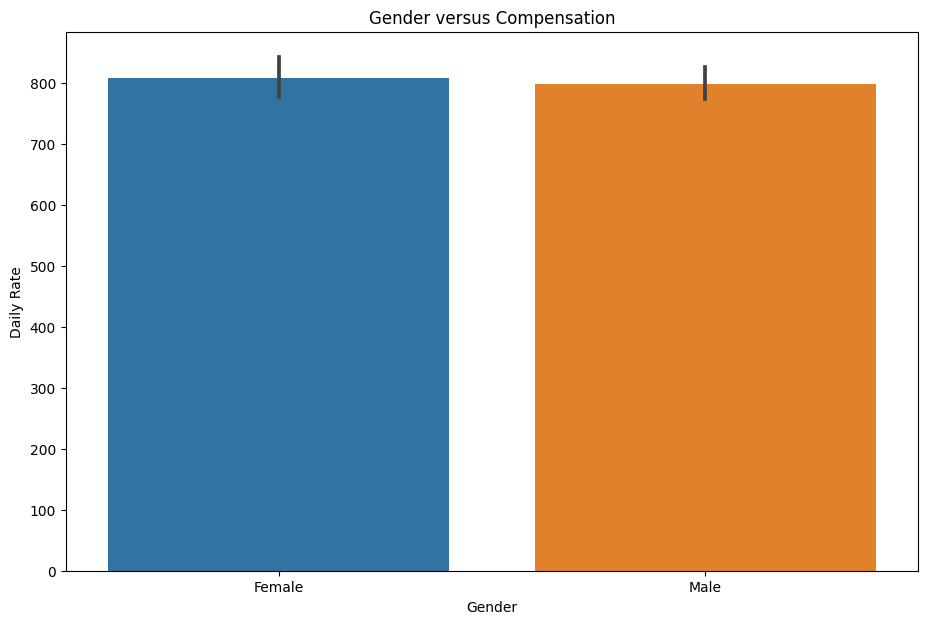

In [26]:
# Analyzing gender pay gap using a box plot
plt.figure(figsize=(11, 7))
sns.barplot(x='Gender', y='MonthlyRate', data=df)
plt.xlabel('Gender')
plt.ylabel('Monthly Rate')
plt.title('Gender versus Compensation')
plt.show()

In [27]:
# Checking the 1st, 2nd and 3rd quartiles for daily rates for all job roles
grouped = df.groupby('JobRole')
quartiles = grouped['DailyRate'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns= ['Q1', 'Median (Q2)', 'Q3']
print(quartiles)

                               Q1  Median (Q2)       Q3
JobRole                                                
Healthcare Representative  507.00        827.0  1224.00
Human Resources            357.25        797.5  1120.50
Laboratory Technician      441.00        805.0  1155.00
Manager                    423.25        723.5  1190.25
Manufacturing Director     480.00        799.0  1091.00
Research Director          442.75        811.5  1128.50
Research Scientist         467.25        821.5  1132.25
Sales Executive            493.75        791.5  1175.50
Sales Representative       474.00        746.0  1162.00
